In [1]:
import json
from StringIO import StringIO
import openpyxl
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-23_V5.csv', low_memory = False)
#ALWAYS REMOVE THESE ROWS WHENEVER IMPORTING LISTINGS -- NB: THESE ROWS MIGHT VARY BASED ON NEW DATAPREP RUN
listings = listings.drop(listings.index[4216:4219])

In [3]:
listings.index = [i for i in range(len(listings))]

In [4]:
listings = listings.drop('distance_from_ocean', axis = 1)

In [5]:
lst2 = []
for i,k in zip(listings['latitude'],listings['longitude']):
    lon_diff = (float(k) + 117.235585)*np.pi/180
    lat_diff = (float(i) - 32.802458)*np.pi/180
    a = np.sin(lat_diff/2)**2 + np.cos(float(i)*np.pi/180)*np.cos(32.802458*np.pi/180)*(np.sin(lon_diff/2)**2)
    c = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = 6371.00*float(c)
    lst2.append(d)

listings['distance_from_ocean'] = lst2

In [6]:
listings_augmented_numeric = listings.select_dtypes(include=['float64', 'int64'])

In [7]:
listings_augmented_numeric = listings_augmented_numeric.fillna(listings_augmented_numeric)

In [8]:
listings_augmented_numeric = listings_augmented_numeric.fillna(listings_augmented_numeric.mean())

In [9]:
listings_augmented_numeric = listings_augmented_numeric.dropna(1)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(listings_augmented_numeric)

In [11]:
kmeans.labels_

array([2, 0, 1, ..., 0, 2, 2], dtype=int32)

In [12]:
class_cluster_dictionary = {}

for i in range(10):
    class_cluster_dictionary[i] = []

In [13]:
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)

In [14]:
colors = kmeans.labels_

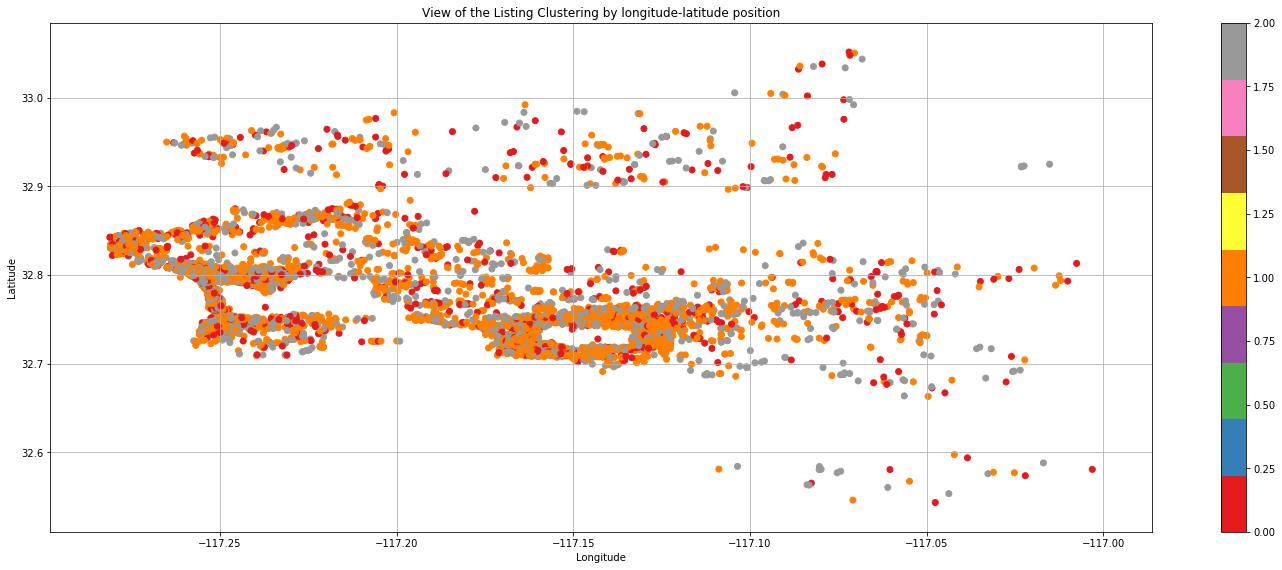

In [15]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], 
               c = colors, cmap = 'Set1')
fig.colorbar(l)
#ax.set_xlim((listings_augmented_numeric['longitude'].min() - .1, -116.8))
#ax.set_ylim((32, listings_augmented_numeric['latitude'].max() + .1))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering by longitude-latitude position')
fig.tight_layout(pad = 1)
ax.grid(True)
plt.show()

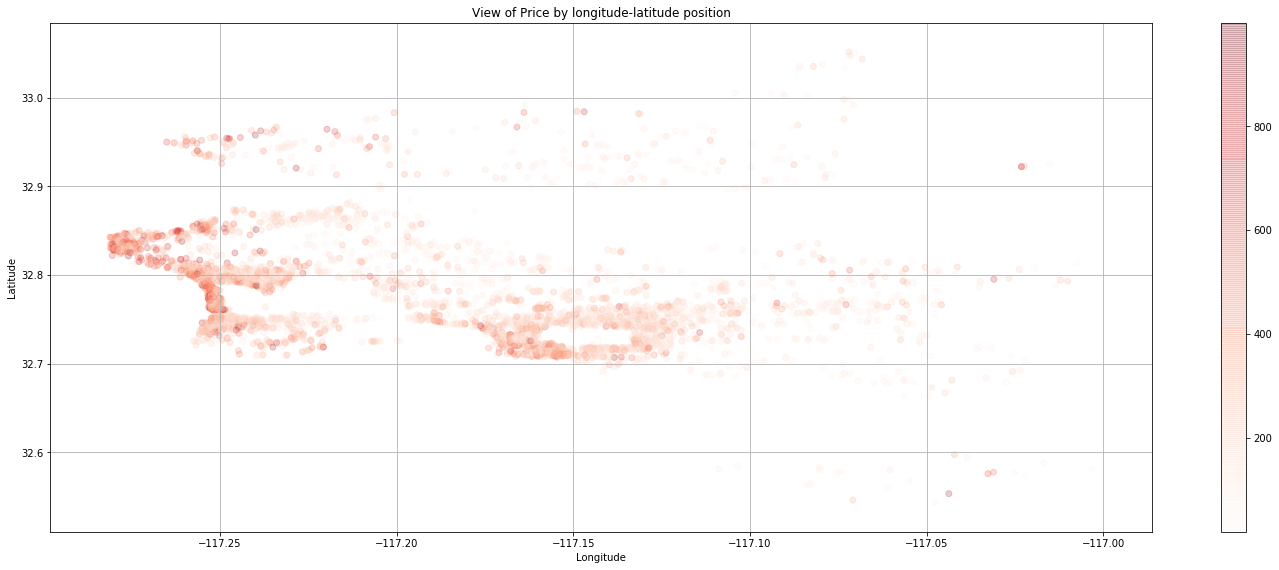

In [16]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'],
               c = listings_augmented_numeric['price_y'], cmap = 'Reds', alpha=0.2)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of Price by longitude-latitude position')
fig.tight_layout(pad = 1)
ax.grid(True)
plt.show()

In [17]:
listings['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible', 'super_strict_60',
       'super_strict_30', 'no_refunds'], dtype=object)

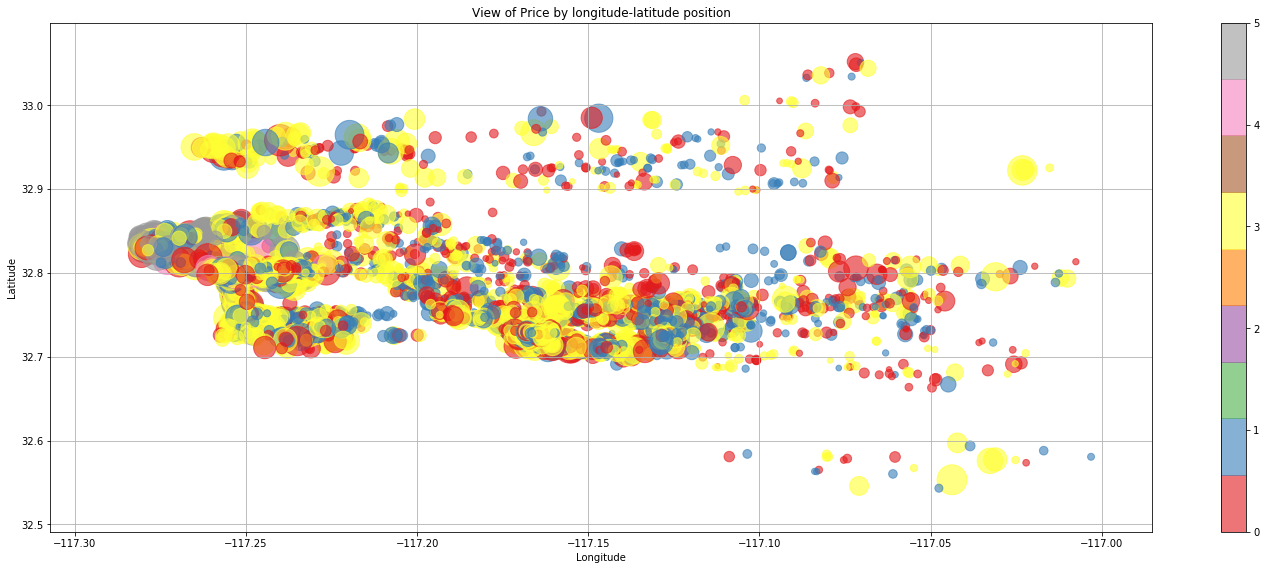

In [18]:
#IF YOU WANT TO USE CATEGORICAL FEATURES, THOSE HAVE ALREADY BEEN ENCODED/BINARIZED FOR YOU
#JUST APPEND _enc AT THE END OF THE COL NAME, OR _bin IF IT'S A BINARY FEATURE
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], 
               s = listings_augmented_numeric['price_y'], c = listings_augmented_numeric['cancellation_policy_enc'],
              cmap= 'Set1', alpha=0.6)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of Price by longitude-latitude position')
fig.tight_layout(pad = 1)
ax.grid(True)
plt.show()

In [19]:
# A mapping of the encoding
K = []
for w in zip(listings['cancellation_policy'], listings.cancellation_policy_enc):
    if w not in K:
        K.append(w)
K

NameError: name 'listings_augmented_2018' is not defined

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], 
               s = listings_augmented_numeric['price_y'], c = listings_augmented_numeric['availability_30'],
              alpha = 0.4)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of Availability 30 by longitude-latitude position')
#fig.tight_layout(pad = 1)
ax.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude']
               , s = listings_augmented_numeric['price_y'], c = listings_augmented_numeric['availability_90'],
              alpha=0.3)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of Availability 90 by longitude-latitude position')
ax.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], 
               c = listings_augmented_numeric['host_is_superhost_bin'],
              cmap = 'winter', alpha=0.5)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of Superhosts by longitude-latitude position')
fig.tight_layout(pad = 1)
ax.grid(True)
plt.show()

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(listings_augmented_numeric)

In [ ]:
kmeans.labels_

In [ ]:
class_cluster_dictionary = {}

for i in range(2):
    class_cluster_dictionary[i] = []

In [ ]:
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)

In [ ]:
colors = kmeans.labels_

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], 
               c = colors)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering with K = %f by longitude-latitude position'%(int(num_clusters)))
ax.grid(True)
plt.show()

In [ ]:
num_clusters = 3

kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings_augmented_numeric)

class_cluster_dictionary = {}

for i in range(3):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], c = colors)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering with K = %f by longitude-latitude position'%(int(num_clusters)))
ax.grid(True)
plt.show()

In [ ]:
kmeans.labels_

In [ ]:
kmeans.cluster_centers_

In [ ]:
num_clusters = 4

kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings_augmented_numeric)

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], c = colors)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering with K = %f by longitude-latitude position'%(int(num_clusters)))
ax.grid(True)
plt.show()

In [ ]:
num_clusters = 5

kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings_augmented_numeric)

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], c = colors)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering with K = %f by longitude-latitude position'%(int(num_clusters)))
ax.grid(True)
plt.show()

In [ ]:
num_clusters = 3
features = ['bedrooms', 'bathrooms', 'accommodates', 'beds']
kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings_augmented_numeric[features])

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], c = colors)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering with K = %f and features %s'%(num_clusters, ", ".join(features)))
ax.grid(True)
plt.show()

In [ ]:
num_clusters = 3
features = ['longitude','latitude']
kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings_augmented_numeric[features])

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings_augmented_numeric)):
    key = kmeans.labels_[i]
    v = listings_augmented_numeric['listing_id_x'][i]
    
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings_augmented_numeric['longitude'], listings_augmented_numeric['latitude'], 
               c = colors, alpha=.4)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('View of the Listing Clustering with K = %f and features: %s'%(num_clusters, ", ".join(features)))
ax.grid(True)
plt.show()

In [ ]:
#Was trying DBSCAN but not sure it's worth pursuing

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN

In [ ]:
distance_matrix = pairwise_distances(listings_augmented_numeric[['longitude', 'latitude']], metric='euclidean')

In [ ]:
dbscan = DBSCAN(metric='precomputed', eps=3, min_samples=10)

In [ ]:
labels = dbscan.fit_predict(distance_matrix)

In [ ]:
labels

In [ ]:
max(labels)